# An introduction to Data Analytics: Day 2
Pandas, matplotlib, and more

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

We downloaded the incident.csv dataset from here: https://docs.celonis.com/en/event-log-sample-files.html

In [3]:
df_incidents = pd.read_csv('./data/incident.csv')
df_incidents.head()  # "head" displays the first 5 records in the dataframe

,number,sys_created_on,sys_created_by,opened_at,resolved_at,reopened_time,activity_due,closed_at,closed_by,due_date,sla_due,contact_type,category,urgency,short_description,priority,state,escalation
0,INC0,2020-01-01 02:22:21,UserA,2020-03-26 01:40:07,2020-06-06 13:34:48,NaN,NaN,NaN,UserC,2020-05-17 22:15:02,NaN,walk-in,Help,1 High,This is a description,2 - High,In Progress,Moderate
1,INC1,2020-02-28 11:44:42,UserA,2020-03-09 05:35:03,NaN,NaN,2020-04-13 09:16:21,NaN,UserA,NaN,NaN,phone,Software,1 High,This is a description,3 - Moderate,In Progress,New
2,INC2,2020-01-12 18:57:25,UserG,2020-03-27 04:05:08,NaN,NaN,2020-03-25 00:06:29,NaN,UserB,NaN,2020-06-05 07:38:10,phone,Hardware,2 Medium,This is a description,4 - Low,Normal,NaN
3,INC3,2020-01-08 06:31:25,UserB,2020-02-24 16:16:52,NaN,NaN,NaN,NaN,UserB,NaN,NaN,phone,Software,3 Low,This is a description,4 - Low,On Hold,Overdue
4,INC4,2020-02-23 03:59:31,UserA,2020-02-18 21:54:20,NaN,NaN,2020-03-26 09:29:55,NaN,UserA,NaN,NaN,email,Network,2 Medium,This is a description,4 - Low,On Hold,Normal


In [4]:
df_incidents.tail()  # "tail" gives us the last 5 records in the dataframe

,number,sys_created_on,sys_created_by,opened_at,resolved_at,reopened_time,activity_due,closed_at,closed_by,due_date,sla_due,contact_type,category,urgency,short_description,priority,state,escalation
49995,INC49995,2020-02-08 12:12:33,UserF,2020-02-19 03:13:07,NaN,NaN,2020-04-08 08:03:22,NaN,UserD,2020-05-23 05:10:17,NaN,email,Software,1 High,This is a description,5 - Planning,NaN,NaN
49996,INC49996,2020-01-22 05:56:29,UserA,2020-03-14 21:06:57,NaN,NaN,NaN,NaN,UserA,2020-05-13 03:43:58,NaN,email,Smartphone,2 Medium,This is a description,3 - Moderate,NaN,High
49997,INC49997,2020-02-09 22:35:22,UserB,2020-02-10 10:59:58,NaN,NaN,2020-03-04 02:09:01,NaN,UserB,NaN,NaN,phone,Hardware,3 Low,This is a description,5 - Planning,Normal,Normal
49998,INC49998,2020-02-21 12:26:55,UserE,2020-03-25 16:30:28,NaN,NaN,NaN,NaN,UserB,NaN,NaN,walk-in,Network,2 Medium,This is a description,5 - Planning,Closed,Overdue
49999,INC49999,2020-01-21 00:06:43,UserA,2020-03-11 03:49:24,NaN,NaN,2020-03-14 17:27:12,NaN,UserA,NaN,NaN,phone,Help,2 Medium,This is a description,2 - High,Closed,New


In [10]:
df_incidents.iloc[5,0:3]  # "iloc" helps me slice the dataframe by index

number                           INC5
sys_created_on    2020-02-23 09:51:05
sys_created_by                  UserC
Name: 5, dtype: object

In [9]:
df_incidents.loc[5, 'number':'sys_created_by']  # "loc" is a more "labeled" way to slice your dataframe

number                           INC5
sys_created_on    2020-02-23 09:51:05
sys_created_by                  UserC
Name: 5, dtype: object

In [11]:
# with pandas, there are usually multiple ways to do the same thing
df_incidents[df_incidents.index==5][['number','sys_created_on', 'sys_created_by']]

,number,sys_created_on,sys_created_by
5,INC5,2020-02-23 09:51:05,UserC


In [12]:
# usually one of the first things we check when reading in a new dataframe is how pandas "data types" each column
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   number             50000 non-null  object
 1   sys_created_on     50000 non-null  object
 2   sys_created_by     50000 non-null  object
 3   opened_at          50000 non-null  object
 4   resolved_at        10110 non-null  object
 5   reopened_time      8316 non-null   object
 6   activity_due       25112 non-null  object
 7   closed_at          6287 non-null   object
 8   closed_by          50000 non-null  object
 9   due_date           16757 non-null  object
 10  sla_due            12541 non-null  object
 11  contact_type       50000 non-null  object
 12  category           50000 non-null  object
 13  urgency            50000 non-null  object
 14  short_description  50000 non-null  object
 15  priority           50000 non-null  object
 16  state              39998 non-null  objec

In [36]:
# it's often helpful to appropriately "type" timestamps, numerics, and categorical variables
# make note of how I both refer to a column with "key" notation and "dot" notation
df_incidents['sys_created_on'] = pd.to_datetime(df_incidents.sys_created_on)
df_incidents['opened_at'] = pd.to_datetime(df_incidents.opened_at)
df_incidents['activity_due'] = pd.to_datetime(df_incidents.activity_due)
df_incidents['due_date'] = pd.to_datetime(df_incidents.due_date)
df_incidents['sla_due'] = pd.to_datetime(df_incidents.sla_due)

df_incidents['category'] = df_incidents.category.astype('category')
df_incidents['urgency'] = df_incidents.urgency.astype('category')
df_incidents['priority'] = df_incidents.priority.astype('category')

# adding "date" fields can be helpful later on
df_incidents['opened_at_dt'] = pd.to_datetime(df_incidents.sys_created_on).dt.date
df_incidents['opened_at_dow'] = pd.to_datetime(df_incidents.sys_created_on).dt.dayofweek

In [37]:
df_incidents.describe()  # this is sometimes called the 5 number summary

,sys_created_on,opened_at,activity_due,due_date,sla_due,opened_at_dow
count,50000,50000,25112,16757,12541,50000.000000
mean,2020-01-30 11:18:29.030279936,2020-02-29 13:20:21.254459904,2020-03-30 06:22:42.740363520,2020-04-29 15:25:33.722504448,2020-05-30 06:10:55.335938048,2.995260
min,2020-01-01 00:02:16,2020-02-01 00:03:11,2020-03-01 00:02:51,2020-04-01 00:01:20,2020-05-01 00:07:37,0.000000
25%,2020-01-15 00:33:09.750000128,2020-02-14 22:01:39.750000128,2020-03-14 20:04:53.750000128,2020-04-14 17:04:19,2020-05-15 00:21:45,1.000000
50%,2020-01-28 22:57:12,2020-03-01 01:42:26,2020-03-28 17:05:19,2020-04-28 10:59:59,2020-05-28 17:05:13,3.000000
75%,2020-02-14 23:16:09.500000,2020-03-15 02:57:51,2020-04-14 15:27:47.249999872,2020-05-14 12:42:25,2020-06-14 17:10:03,5.000000
max,2020-02-28 23:59:22,2020-03-28 23:59:34,2020-04-28 23:58:48,2020-05-28 23:58:01,2020-06-28 23:58:15,6.000000
std,NaN,NaN,NaN,NaN,NaN,1.997908


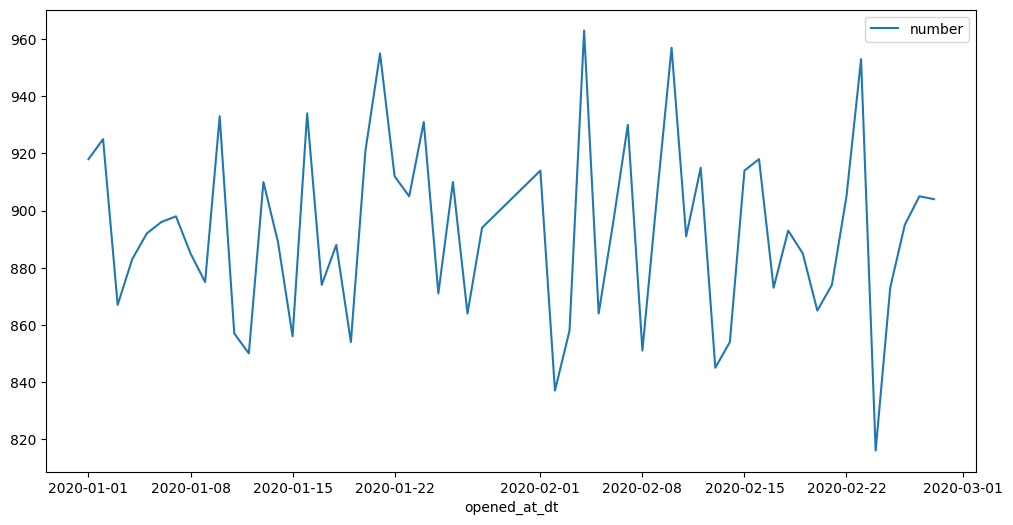

In [45]:
fig, ax = plt.subplots(figsize=(12, 6))

_ = df_incidents[['opened_at_dt','number']].groupby('opened_at_dt').count().plot.line(ax=ax)